###推荐一个python数据结构可视化工具：www.pythontutor.com

**任务**

    mysql数据库的基本操作
    
    用python操作数据库
    
    编写python爬虫并保存到数据库

数据库：数据库管理系统

### Mysql数据库

MariaDB目的是完全兼容Mysql,包括API和命令行，使之能轻松成为Mysql的代替品

### 关系型数据库

如Mysql

### 非关系型数据库

如 mongodb,redis

In [1]:
dict={
    'a':100,
    'b':200
}

In [2]:
dict

{'a': 100, 'b': 200}

In [3]:
type(dict)

dict

json格式数据读取

In [4]:
import json

data_2='{"a":1,"b":2,"c":3}'
type(data_2)

str

In [5]:
j_data=json.loads(data_2)
type(j_data)

dict

In [10]:
import json
with open('saletrend.js','r') as f:
    i=0
    for i in f:
        print(i)

var data = [

	{

		name: '特比澳',

		values: 114074.963795999,

		chart: 'bar',

		type: 'bu'

	}

];


### mysql数据库的基本操作

**链接数据库：**

终端输入  mysql -u root -p  

**查看数据库：**

终端输入  show databases;

**选择数据库**
终端输入  use+数据库名;

**查看数据库中的table**

终端输入 show tables;

**查看表的结构**

终端输入  desc+表名

**查看表中的数据**

终端输入 select * from 表名；

**查看数据并限制**

终端输入 select * from 表名 limit 10；

**数据库管理工具**

sequelpro------ http://www.sequelpro.com/

navicat

### Mysql 与 excel 的不同

1. 存储数量（excel最多存6万多条）
2. 查看数据范围（Excel每次必须全部打开）

Mysql数据类型：http://www.runoob.com/mysql/mysql-data-types.html

### 命令行操作数据库

**创建数据库**

CREATE DATABASE wrz2019;

**删除数据库**

DROP DATABASE wrz2019;

**创建数据库,并指定字符集和校对集**

CREATE DATABASE wrz2019 default charset utf8mb4 collate utf8mb4_general_ci;

**创建表格**

CREATE TABLE class(
id int(11) UNSIGNED NOT NULL AUTO_INCREMENT,NAME VARCHAR(80) NOT NULL, PRIMARY KEY(ID)
)

**插入数据**

INSERT INTO `class`(`id`,`name`) 

VALUES(1,'高一三班');

**修改数据**

UPDATE `class` SET `name`='高一五班' 

WHERE `name`='高一三班';

**删除数据**

DELETE FROM `class`

WHERE `name`='高一三班';

### 使用python去操作数据库

In [10]:
import pymysql

In [11]:
pymysql.install_as_MySQLdb() 

In [12]:
import MySQLdb

In [13]:
DATABASE={
    'host':'127.0.0.1',
    'database':'wrz2019',
    'user':'root',
    'password':'root',
    'charset':'utf8mb4'
}

In [14]:
# 打开数据库连接
db = MySQLdb.connect(host="127.0.0.1", user="root", password="root",db='wrz2019')


In [15]:
db = MySQLdb.connect("127.0.0.1", "root", "root",'wrz2019')


In [16]:
DATABASEdb = MySQLdb.connect(**DATABASE)

In [17]:
# 使用cursor()方法获取操作游标 
cursor = db.cursor()

In [19]:
# 使用execute方法执行SQL语句
#sql='select * from ASCVD where id<2 limit 4'
sql='select * from class '
cursor.execute(sql)

1

In [20]:
# 使用 fetchone() 方法获取一条数据
data = cursor.fetchone()
for row in data:
    print(row)

1
高一五班


In [21]:
# 使用 fetchone() 方法获取全部数据
data = cursor.fetchall()
for row in data:
    print(row)

In [25]:
#插入数据
sql="insert into `class`(`name`)values('高一四班');"
cursor = db.cursor()
cursor.execute(sql)
db.commit()#在数据库中记录

In [24]:
#删除操作
sql="DELETE FROM `class` WHERE `name`='高一四班';"
cursor = db.cursor()
cursor.execute(sql)
db.commit()#在数据库中记录

In [28]:
#更新操作
sql="UPDATE  `class` SET `name`='高一十四班' where `name`='高一四班';"
cursor = db.cursor()
cursor.execute(sql)
db.commit()#在数据库中记录

In [29]:
#捕捉异常
try:
    a=10
    b=1+'hello'
except TypeError as e:
    print(e)

unsupported operand type(s) for +: 'int' and 'str'


In [33]:
#数据库回滚

In [32]:
try:
    sql_one="insert into `class`(`name`)values('高一十五班');"
    cursor = db.cursor()
    cursor.execute(sql_one)
    db.commit()#在数据库中记录
    error=10+'aaa'
except TypeError as e:
    print(e)
    db.rollback()

unsupported operand type(s) for +: 'int' and 'str'


### 爬虫

用的python库：

    1. requests 用来获取网页内容
    2. BeautifulSoup 提取

In [13]:
#pip install requests
#pip install bs4
import requests

from bs4 import BeautifulSoup

In [14]:
#因服务器拒绝访问，所以，增加headers，模拟浏览器访问
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) ' 'Chrome/51.0.2704.63 Safari/537.36'}
url='https://bj.lianjia.com/zufang/'
responce=requests.get(url,headers = headers, timeout = 30)
responce

<Response [200]>

'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n  <meta http-equiv="Cache-Control" content="no-transform" />\n  <meta http-equiv="Cache-Control" content="no-siteapp" />\n  <meta http-equiv="Content-language" content="zh-CN" />\n  <meta name="format-detection" content="telephone=no" />\n  <meta name="applicable-device" content="pc">\n\t<meta name="description" content="贝壳北京租房网,提供真实的北京租房信息、出租房源信息、租房价格,包括北京整租、合租、公寓出租等信息,以及北京房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来北京贝壳租房!">\n\t<meta name="keywords" content="北京租房信息,北京出租房网,北京房屋出租价格">\n\t<meta http-equiv="Cache-Control" content="no-transform " />\n\t<title>北京租房信息_北京出租房源|房屋出租价格【北京贝壳租房】</title>\n\t<link href="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/resource/img/favicon.ico?_v=201901242250110ac" type="image/x-icon" rel="icon">\n\t\t<link rel="stylesheet" href="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/common/css/comm
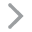

In [15]:
responce.text

<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-transform" http-equiv="Cache-Control"/>
<meta content="no-siteapp" http-equiv="Cache-Control"/>
<meta content="zh-CN" http-equiv="Content-language"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="pc" name="applicable-device"/>
<meta content="贝壳北京租房网,提供真实的北京租房信息、出租房源信息、租房价格,包括北京整租、合租、公寓出租等信息,以及北京房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来北京贝壳租房!" name="description"/>
<meta content="北京租房信息,北京出租房网,北京房屋出租价格" name="keywords"/>
<meta content="no-transform " http-equiv="Cache-Control"/>
<title>北京租房信息_北京出租房源|房屋出租价格【北京贝壳租房】</title>
<link href="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/resource/img/favicon.ico?_v=201901242250110ac" rel="icon" type="image/x-icon"/>
<link href="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/common/css/common.css?_v=201901242250110ac" rel="stylesheet"/>
<script>
    var g
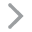

In [16]:
#结构化
soup=BeautifulSoup(responce.text,'lxml')
soup

In [22]:
links_div=soup.find_all('div', class_="content__list--item")
links_div

[<div class="content__list--item">
 <a class="content__list--item--aside" href="/zufang/BJ2163168790685696000.html" target="_blank"><img alt="整租 ·   东湖湾 东南向居室 家具家电齐全随时入住 安静不临街" class="lazyload" data-src="https://image1.ljcdn.com/110000-inspection/51146d3e-ba2c-44a3-b8a8-95c8c924e28e.jpg.250x182.jpg" src="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/resource/default/250-182.png?_v=201901242250110ac"/></a>
 <div class="content__list--item--main">
 <p class="content__list--item--title twoline">
 <a href="/zufang/BJ2163168790685696000.html" target="_blank">
                     整租 ·   东湖湾 东南向居室 家具家电齐全随时入住 安静不临街                  </a>
 </p>
 <p class="content__list--item--des">
 <a href="/zufang/chaoyang" target="_blank">朝阳</a>-<a href="/zufang/wangjing" target="_blank">望京</a>
 <i>/</i>
                   65㎡
                   <i>/</i>东 南                  <i>/</i>
                     1室1厅1卫                  <span class="hide">
 <i>/</i>
                     高楼层                       

In [23]:
links_div[0]

<div class="content__list--item">
<a class="content__list--item--aside" href="/zufang/BJ2163168790685696000.html" target="_blank"><img alt="整租 ·   东湖湾 东南向居室 家具家电齐全随时入住 安静不临街" class="lazyload" data-src="https://image1.ljcdn.com/110000-inspection/51146d3e-ba2c-44a3-b8a8-95c8c924e28e.jpg.250x182.jpg" src="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/resource/default/250-182.png?_v=201901242250110ac"/></a>
<div class="content__list--item--main">
<p class="content__list--item--title twoline">
<a href="/zufang/BJ2163168790685696000.html" target="_blank">
                    整租 ·   东湖湾 东南向居室 家具家电齐全随时入住 安静不临街                  </a>
</p>
<p class="content__list--item--des">
<a href="/zufang/chaoyang" target="_blank">朝阳</a>-<a href="/zufang/wangjing" target="_blank">望京</a>
<i>/</i>
                  65㎡
                  <i>/</i>东 南                  <i>/</i>
                    1室1厅1卫                  <span class="hide">
<i>/</i>
                    高楼层                                      

In [24]:
links_div[1].a

<a class="content__list--item--aside" href="/zufang/BJ2163170134481436672.html" target="_blank"><img alt="整租 · 科学园南里三区一居室 南朝向 诚意出租  看房随时" class="lazyload" data-src="https://image1.ljcdn.com/110000-inspection/93e9a1a0-e0bf-40f6-aef4-b12952f8b709.jpg.250x182.jpg" src="https://s1.ljcdn.com/matrix_lianjia_pc/dist/pc/src/resource/default/250-182.png?_v=201901242250110ac"/></a>

In [25]:
links_div[1].a.get('href')

'/zufang/BJ2163170134481436672.html'

In [27]:
#获取所需链接
links=[div.a.get('href') for div in links_div]
links

['/zufang/BJ2163168790685696000.html',
 '/zufang/BJ2163170134481436672.html',
 '/zufang/BJ2163170148809179136.html',
 '/zufang/BJ2163170985925419008.html',
 '/zufang/BJ2163171130771783680.html',
 '/zufang/BJ2163171752854175744.html',
 '/zufang/BJ2163171890712559616.html',
 '/zufang/BJ2163171919661105152.html',
 '/zufang/BJ2163172115728580608.html',
 '/zufang/BJ2164284694047768576.html',
 '/zufang/BJ2164318333078339584.html',
 '/zufang/BJ2164325629237919744.html',
 '/zufang/BJ2166415808384221184.html',
 '/zufang/BJ2167229674445881344.html',
 '/zufang/BJ2168133760296960000.html',
 '/zufang/BJ2169384146131501056.html',
 '/zufang/BJ2169962949698134016.html',
 '/zufang/BJ2170109597565075456.html',
 '/zufang/BJ2170228171209703424.html',
 '/zufang/BJ2170293780450639872.html',
 '/zufang/BJ2170736323521429504.html',
 '/zufang/BJ2170750037804449792.html',
 '/zufang/BJ2170841572105789440.html',
 '/zufang/BJ2170950166637715456.html',
 '/zufang/BJ2171044991085330432.html',
 '/zufang/BJ2171522427241

In [28]:
len(links)

30

In [37]:
new_links=['https://bj.lianjia.com'+x for x in links]
new_links

['https://bj.lianjia.com/zufang/BJ2163168790685696000.html',
 'https://bj.lianjia.com/zufang/BJ2163170134481436672.html',
 'https://bj.lianjia.com/zufang/BJ2163170148809179136.html',
 'https://bj.lianjia.com/zufang/BJ2163170985925419008.html',
 'https://bj.lianjia.com/zufang/BJ2163171130771783680.html',
 'https://bj.lianjia.com/zufang/BJ2163171752854175744.html',
 'https://bj.lianjia.com/zufang/BJ2163171890712559616.html',
 'https://bj.lianjia.com/zufang/BJ2163171919661105152.html',
 'https://bj.lianjia.com/zufang/BJ2163172115728580608.html',
 'https://bj.lianjia.com/zufang/BJ2164284694047768576.html',
 'https://bj.lianjia.com/zufang/BJ2164318333078339584.html',
 'https://bj.lianjia.com/zufang/BJ2164325629237919744.html',
 'https://bj.lianjia.com/zufang/BJ2166415808384221184.html',
 'https://bj.lianjia.com/zufang/BJ2167229674445881344.html',
 'https://bj.lianjia.com/zufang/BJ2168133760296960000.html',
 'https://bj.lianjia.com/zufang/BJ2169384146131501056.html',
 'https://bj.lianjia.com

In [ ]:
#封装函数